In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline

df1 = pd.read_csv('movies.dat', sep='::', encoding='latin-1',usecols=[0,1,2], 
                 names=['moviesid','moviename','category'])

df2 = pd.read_csv('users.dat', sep='::', encoding='latin-1',usecols=[0,1,2,3,4], 
                 names=['userid','gender','age','occupation','zip-code'])

df3 = pd.read_csv('ratings.dat', sep='::', encoding='latin-1',usecols=[0,1,2,3], 
                 names=['id','movieid','ratings','timestamp'])

df3

C:\Users\asimj\AppData\Local\Temp\ipykernel_1760\212178550.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('movies.dat', sep='::', encoding='latin-1',usecols=[0,1,2],
C:\Users\asimj\AppData\Local\Temp\ipykernel_1760\212178550.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('users.dat', sep='::', encoding='latin-1',usecols=[0,1,2,3,4],
C:\Users\asimj\AppData\Local\Temp\ipykernel_1760\212178550.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are inte

,id,movieid,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [2]:
f_df=pd.concat([df1,df2,df3],axis=1)
f_df.head()

,moviesid,moviename,category,userid,gender,age,occupation,zip-code,id,movieid,ratings,timestamp
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067,1,1193,5,978300760
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,M,56.0,16.0,70072,1,661,3,978302109
2,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,M,25.0,15.0,55117,1,914,3,978301968
3,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,M,45.0,7.0,02460,1,3408,4,978300275
4,5.0,Father of the Bride Part II (1995),Comedy,5.0,M,25.0,20.0,55455,1,2355,5,978824291


In [3]:
f_df.shape

(1000209, 12)

In [4]:
f_df.value_counts('ratings')

ratings
4    348971
3    261197
5    226310
2    107557
1     56174
dtype: int64

In [5]:
f_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   moviesid    3883 non-null     float64
 1   moviename   3883 non-null     object 
 2   category    3883 non-null     object 
 3   userid      6040 non-null     float64
 4   gender      6040 non-null     object 
 5   age         6040 non-null     float64
 6   occupation  6040 non-null     float64
 7   zip-code    6040 non-null     object 
 8   id          1000209 non-null  int64  
 9   movieid     1000209 non-null  int64  
 10  ratings     1000209 non-null  int64  
 11  timestamp   1000209 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [6]:
f_df.columns

Index(['moviesid', 'moviename', 'category', 'userid', 'gender', 'age',
       'occupation', 'zip-code', 'id', 'movieid', 'ratings', 'timestamp'],
      dtype='object')

In [7]:
f_df.dtypes

moviesid      float64
moviename      object
category       object
userid        float64
gender         object
age           float64
occupation    float64
zip-code       object
id              int64
movieid         int64
ratings         int64
timestamp       int64
dtype: object

In [8]:
f_df.corr()

C:\Users\asimj\AppData\Local\Temp\ipykernel_1760\3330469239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  f_df.corr()


,moviesid,userid,age,occupation,id,movieid,ratings,timestamp
moviesid,1.000000,0.999944,-0.004667,0.003366,0.991041,0.008771,-0.153298,0.072268
userid,0.999944,1.000000,0.005713,-0.018120,0.996036,0.037970,0.003874,0.128387
age,-0.004667,0.005713,1.000000,0.065210,0.007219,-0.002244,-0.004937,-0.002258
occupation,0.003366,-0.018120,0.065210,1.000000,-0.016326,0.024284,0.003677,-0.028196
id,0.991041,0.996036,0.007219,-0.016326,1.000000,-0.017739,0.012303,-0.490383
movieid,0.008771,0.037970,-0.002244,0.024284,-0.017739,1.000000,-0.064042,0.041632
ratings,-0.153298,0.003874,-0.004937,0.003677,0.012303,-0.064042,1.000000,-0.026770
timestamp,0.072268,0.128387,-0.002258,-0.028196,-0.490383,0.041632,-0.026770,1.000000


In [9]:
f_df.isnull().sum()

moviesid      996326
moviename     996326
category      996326
userid        994169
gender        994169
age           994169
occupation    994169
zip-code      994169
id                 0
movieid            0
ratings            0
timestamp          0
dtype: int64

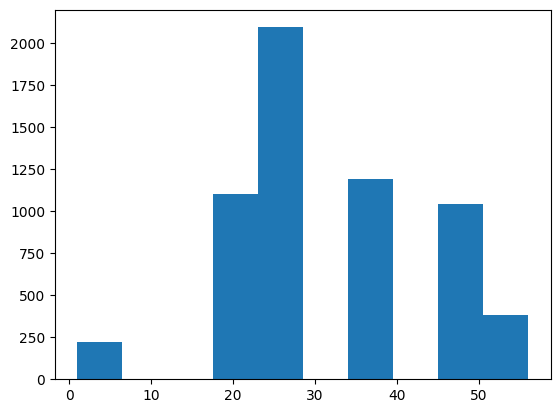

In [10]:
plt.hist(f_df['age'])
plt.show()

Axes(0.125,0.11;0.775x0.77)


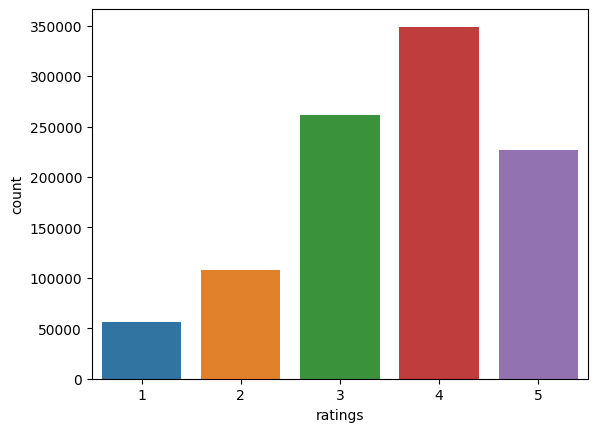

In [11]:
print(sns.countplot(data=f_df,x='ratings'))

In [12]:
f_df.dropna(inplace=True)


In [13]:
f500=f_df[0:568]
f500.head()

,moviesid,moviename,category,userid,gender,age,occupation,zip-code,id,movieid,ratings,timestamp
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067,1,1193,5,978300760
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,M,56.0,16.0,70072,1,661,3,978302109
2,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,M,25.0,15.0,55117,1,914,3,978301968
3,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,M,45.0,7.0,02460,1,3408,4,978300275
4,5.0,Father of the Bride Part II (1995),Comedy,5.0,M,25.0,20.0,55455,1,2355,5,978824291


In [14]:
f500['gender']=f500['gender'].replace({'M':1,'F':0})

C:\Users\asimj\AppData\Local\Temp\ipykernel_1760\635820655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f500['gender']=f500['gender'].replace({'M':1,'F':0})


In [15]:
f500

,moviesid,moviename,category,userid,gender,age,occupation,zip-code,id,movieid,ratings,timestamp
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,0,1.0,10.0,48067,1,1193,5,978300760
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,1,56.0,16.0,70072,1,661,3,978302109
2,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,1,25.0,15.0,55117,1,914,3,978301968
3,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,1,45.0,7.0,02460,1,3408,4,978300275
4,5.0,Father of the Bride Part II (1995),Comedy,5.0,1,25.0,20.0,55455,1,2355,5,978824291
...,...,...,...,...,...,...,...,...,...,...,...,...
563,567.0,Kika (1993),Drama,564.0,1,45.0,1.0,49419,8,506,3,978230483
564,568.0,Bhaji on the Beach (1993),Comedy|Drama,565.0,1,25.0,16.0,45242,8,508,3,978230435
565,569.0,Little Big League (1994),Children's|Comedy,566.0,1,25.0,17.0,92122,8,3213,3,978233462
566,570.0,"Slingshot, The (Kådisbellan ) (1993)",Comedy|Drama,567.0,1,35.0,20.0,52570-9634,8,42,3,978232754


In [16]:
x=f500[['moviesid','age','occupation','gender']].values
y=f500[['ratings']].values
print(x)
print(y)

[[  1.   1.  10.   0.]
 [  2.  56.  16.   1.]
 [  3.  25.  15.   1.]
 ...
 [569.  25.  17.   1.]
 [570.  35.  20.   1.]
 [571.  50.  17.   0.]]
[[5]
 [3]
 [3]
 [4]
 [5]
 [3]
 [5]
 [5]
 [4]
 [4]
 [5]
 [4]
 [4]
 [4]
 [5]
 [4]
 [3]
 [4]
 [5]
 [4]
 [3]
 [3]
 [5]
 [5]
 [3]
 [5]
 [4]
 [4]
 [4]
 [3]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [5]
 [5]
 [4]
 [5]
 [5]
 [5]
 [4]
 [4]
 [4]
 [5]
 [5]
 [4]
 [5]
 [4]
 [4]
 [4]
 [4]
 [5]
 [4]
 [4]
 [3]
 [4]
 [4]
 [5]
 [3]
 [3]
 [3]
 [5]
 [4]
 [3]
 [3]
 [2]
 [5]
 [3]
 [4]
 [3]
 [4]
 [2]
 [3]
 [2]
 [3]
 [4]
 [3]
 [5]
 [3]
 [5]
 [4]
 [2]
 [4]
 [5]
 [5]
 [4]
 [5]
 [4]
 [4]
 [2]
 [3]
 [5]
 [3]
 [3]
 [4]
 [5]
 [4]
 [3]
 [3]
 [3]
 [5]
 [4]
 [4]
 [4]
 [5]
 [4]
 [5]
 [3]
 [3]
 [4]
 [3]
 [3]
 [2]
 [5]
 [4]
 [5]
 [3]
 [5]
 [5]
 [3]
 [3]
 [4]
 [4]
 [2]
 [5]
 [5]
 [3]
 [4]
 [4]
 [5]
 [3]
 [2]
 [3]
 [4]
 [3]
 [4]
 [3]
 [4]
 [3]
 [3]
 [5]
 [4]
 [3]
 [5]
 [5]
 [4]
 [1]
 [3]
 [3]
 [2]
 [5]
 [5]
 [4]
 [4]
 [4]
 [5]
 [3]
 [4]
 [4]
 [3]
 [4]
 [4]
 [3]
 [3]
 [3]
 [5]
 [5]
 [5]
 [4]
 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import confusion_matrix,completeness_score,classification_report

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=42)

x_test

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict=clf.predict(x_test)
# predict

In [18]:
clf.score(x_train,y_train)

1.0

In [19]:
clf.score(x_test,predict)

1.0

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(x_train,y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train,y_train)


C:\Users\asimj\AppData\Local\Temp\ipykernel_1760\3628630387.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


1.0

In [21]:
clf.score(x_test,predict)

1.0

In [22]:
confusion_matrix(y_test,predict)

array([[ 0,  1,  2,  3,  1],
       [ 1,  2,  3,  6,  6],
       [ 2,  7, 14, 17, 10],
       [ 1,  6, 15, 26, 15],
       [ 1,  3, 19, 18,  9]], dtype=int64)

In [23]:
from sklearn. metrics import confusion_matrix,completeness_score,classification_report
print(classification_report (y_test,predict)
)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.11      0.11      0.11        18
           3       0.26      0.28      0.27        50
           4       0.37      0.41      0.39        63
           5       0.22      0.18      0.20        50

    accuracy                           0.27       188
   macro avg       0.19      0.20      0.19       188
weighted avg       0.26      0.27      0.27       188

